## Tugas EDA dan Klasifikasi (25 Oktober 2023)
## Kelompok 2
1. Fauziyah Zayyan Nur
2. Muhamad Irfan
3. Muhammad Hanif Abdillah
4. Raffi Ardhi Naufal
5. Ridwan Abdul Jamil

### Latar belakang

Fraud di kartu kredit adalah penggunaan kartu kredit oleh orang yang tidak berhak. Ini masa kartu kredit masih belum wajib menggunakan chip dan pin ya. Jadi misalnya kartu kredit kita dicuri/dicopet, maka dapat langsung digunakan. Ada juga  tempat yang menggandakan kartu kredit (gampang sebelum menggunakan chip) yang clone-nya kemudian digunakan untuk belanja. Berbeda dengan kartu debit yang langsung autodebet, pembayaran kartu kredit "ditalangi" dulu oleh bank, sehingga bank sangat berkepentingan untuk mencegah fraud (dia yang rugi).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from datetime import datetime

In [2]:
# Load data
data = pd.read_csv("fraud_train.txt")

In [3]:
data.head(10)

,X,id_tanggal_transaksi_awal,tanggal_transaksi_awal,tipe_kartu,id_merchant,nama_merchant,tipe_mesin,tipe_transaksi,nama_transaksi,nilai_transaksi,...,nama_channel,id_channel,flag_transaksi_finansial,status_transaksi,bank_pemilik_kartu,rata_rata_nilai_transaksi,maksimum_nilai_transaksi,minimum_nilai_transaksi,rata_rata_jumlah_transaksi,flag_transaksi_fraud
0,4676,2457646,2457726,111,-2,1798,2605127,26,10,2200000.0,...,1,9,False,3,999,1.332293e+06,9750000.0,10000.0,2.73,0
1,788,2457419,2457507,111,-2,1798,-3,156,12,2500000.0,...,5,8,False,3,999,1.369048e+06,10000000.0,30000.0,2.33,1
2,1520,2457521,2457612,2,-2,1798,-3,156,12,1200000.0,...,5,8,False,3,999,1.552346e+07,100000000.0,41804.0,2.40,0
3,9346,2457659,2457746,103,75336,249,2806174,58,6,320000.0,...,2,4,False,3,999,7.117647e+05,6884408.0,10000.0,1.98,0
4,2914,2457311,2457385,0,-2,1798,2334932,26,10,150000.0,...,1,9,False,3,999,6.179683e+05,2500000.0,100000.0,1.46,0
5,6947,2457413,2457453,111,-2,1798,16834,385,11,100000.0,...,1,9,False,3,999,2.742308e+05,1300000.0,20600.0,1.69,0
6,14131,2457615,2457640,93,-2,1798,1850104,385,11,2000000.0,...,1,9,False,3,999,2.326051e+06,40000000.0,100000.0,1.79,0
7,4811,2457429,2457463,0,-2,1798,2435842,385,11,150000.0,...,1,9,False,3,999,3.924000e+05,4320000.0,25000.0,1.41,0
8,1458,2457371,2457453,93,-2,1798,1370214,159,19,50000.0,...,1,9,False,3,999,7.512486e+05,3550000.0,25000.0,1.88,0
9,4123,2457320,2457365,93,-2,1798,1942704,26,10,1250000.0,...,1,9,False,3,999,9.893071e+05,28000000.0,10000.0,3.64,0


Karakteristik Dataset:

Dataset memiliki 13,125 entri (baris) dengan 28 kolom (atribut).
Beberapa kolom penting dalam dataset termasuk informasi tentang tanggal transaksi, jenis kartu, merchant, tipe transaksi, nilai transaksi, negara, dan sebagainya.

In [4]:
data.dtypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13125 entries, 0 to 13124
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   X                           13125 non-null  int64  
 1   id_tanggal_transaksi_awal   13125 non-null  int64  
 2   tanggal_transaksi_awal      13125 non-null  int64  
 3   tipe_kartu                  13125 non-null  int64  
 4   id_merchant                 13125 non-null  int64  
 5   nama_merchant               13125 non-null  int64  
 6   tipe_mesin                  13125 non-null  int64  
 7   tipe_transaksi              13125 non-null  int64  
 8   nama_transaksi              13125 non-null  int64  
 9   nilai_transaksi             13125 non-null  float64
 10  id_negara                   13125 non-null  int64  
 11  nama_negara                 13125 non-null  int64  
 12  nama_kota                   13125 non-null  int64  
 13  lokasi_mesin                131

In [5]:
print(data.isnull().sum()) 

X                              0
id_tanggal_transaksi_awal      0
tanggal_transaksi_awal         0
tipe_kartu                     0
id_merchant                    0
nama_merchant                  0
tipe_mesin                     0
tipe_transaksi                 0
nama_transaksi                 0
nilai_transaksi                0
id_negara                      0
nama_negara                    0
nama_kota                      0
lokasi_mesin                   0
pemilik_mesin                  0
waktu_transaksi                0
kuartal_transaksi              0
kepemilikan_kartu              0
nama_channel                   0
id_channel                     0
flag_transaksi_finansial       0
status_transaksi               0
bank_pemilik_kartu             0
rata_rata_nilai_transaksi     21
maksimum_nilai_transaksi      21
minimum_nilai_transaksi       21
rata_rata_jumlah_transaksi    21
flag_transaksi_fraud           0
dtype: int64


In [6]:
print(data.describe())

                  X  id_tanggal_transaksi_awal  tanggal_transaksi_awal  \
count  13125.000000               1.312500e+04            1.312500e+04   
mean    7507.821943               2.457490e+06            2.457541e+06   
std     4326.959832               1.047995e+02            1.088401e+02   
min        1.000000               2.457297e+06            2.457303e+06   
25%     3784.000000               2.457404e+06            2.457451e+06   
50%     7475.000000               2.457500e+06            2.457543e+06   
75%    11265.000000               2.457581e+06            2.457632e+06   
max    15000.000000               2.457662e+06            2.457754e+06   

         tipe_kartu    id_merchant  nama_merchant    tipe_mesin  \
count  13125.000000   13125.000000   13125.000000  1.312500e+04   
mean      85.340114   39300.900876    1678.483886  1.649037e+06   
std       40.921347  124187.745686     361.236161  9.914309e+05   
min        0.000000      -2.000000       2.000000 -4.000000e+00  

In [7]:
# Temukan modus dari kolom 'rata_rata_nilai_transaksi'
modus = data['rata_rata_nilai_transaksi'].mode().iloc[0]

# Isi nilai yang hilang dengan modus
data['rata_rata_nilai_transaksi'].fillna(modus, inplace=True)

Cek representasi nilai dari data data kepemilkan_kartu, nama_merchant, nama_kota, dan nama_negara pada dataset

In [8]:
kepemilikan_kartu = set()
for value in data['kepemilikan_kartu']:
    kepemilikan_kartu.add(value)
print(kepemilikan_kartu)

{1, 2}


In [9]:
nama_merchant = set()
for value in data['nama_merchant']:
    nama_merchant.add(value)
print(nama_merchant)

{2, 5, 7, 8, 10, 11, 12, 13, 14, 15, 17, 19, 21, 22, 23, 24, 25, 26, 27, 28, 33, 35, 36, 38, 39, 40, 41, 45, 47, 52, 54, 57, 58, 60, 61, 64, 66, 68, 70, 72, 73, 74, 78, 81, 82, 85, 86, 87, 88, 89, 92, 95, 96, 97, 98, 99, 101, 102, 103, 106, 107, 108, 109, 110, 112, 113, 114, 118, 119, 120, 121, 122, 124, 125, 126, 127, 129, 130, 131, 133, 135, 136, 139, 142, 143, 144, 146, 147, 149, 151, 152, 154, 155, 159, 160, 164, 167, 169, 170, 171, 173, 174, 178, 179, 180, 182, 183, 185, 187, 189, 191, 192, 193, 195, 196, 199, 200, 201, 203, 205, 208, 210, 211, 212, 215, 216, 217, 219, 220, 221, 222, 224, 226, 229, 231, 235, 237, 239, 241, 244, 245, 246, 247, 248, 249, 251, 253, 254, 255, 256, 257, 258, 259, 262, 266, 269, 271, 272, 273, 276, 278, 280, 281, 282, 283, 284, 285, 286, 288, 289, 290, 292, 294, 296, 297, 298, 300, 301, 303, 304, 306, 308, 310, 313, 315, 316, 319, 320, 322, 323, 324, 325, 326, 327, 329, 330, 331, 332, 334, 337, 338, 339, 340, 341, 344, 345, 347, 350, 351, 352, 353, 354,

In [10]:
nama_kota = set()
for value in data['nama_merchant']:
    nama_kota.add(value)
print(nama_kota)

{2, 5, 7, 8, 10, 11, 12, 13, 14, 15, 17, 19, 21, 22, 23, 24, 25, 26, 27, 28, 33, 35, 36, 38, 39, 40, 41, 45, 47, 52, 54, 57, 58, 60, 61, 64, 66, 68, 70, 72, 73, 74, 78, 81, 82, 85, 86, 87, 88, 89, 92, 95, 96, 97, 98, 99, 101, 102, 103, 106, 107, 108, 109, 110, 112, 113, 114, 118, 119, 120, 121, 122, 124, 125, 126, 127, 129, 130, 131, 133, 135, 136, 139, 142, 143, 144, 146, 147, 149, 151, 152, 154, 155, 159, 160, 164, 167, 169, 170, 171, 173, 174, 178, 179, 180, 182, 183, 185, 187, 189, 191, 192, 193, 195, 196, 199, 200, 201, 203, 205, 208, 210, 211, 212, 215, 216, 217, 219, 220, 221, 222, 224, 226, 229, 231, 235, 237, 239, 241, 244, 245, 246, 247, 248, 249, 251, 253, 254, 255, 256, 257, 258, 259, 262, 266, 269, 271, 272, 273, 276, 278, 280, 281, 282, 283, 284, 285, 286, 288, 289, 290, 292, 294, 296, 297, 298, 300, 301, 303, 304, 306, 308, 310, 313, 315, 316, 319, 320, 322, 323, 324, 325, 326, 327, 329, 330, 331, 332, 334, 337, 338, 339, 340, 341, 344, 345, 347, 350, 351, 352, 353, 354,

In [11]:
nama_negara = set()
for value in data['nama_negara']:
    nama_negara.add(value)
print(nama_negara)

{1, 4, 5, 6, 7, 8, 10, 11, 12, 14, 15, 16}


Mari cek jumlah transaksi yang terjadi pada tiap merchant dan negara juga kota, dan pada kepemilikan kartu mana saja yang banyak terjadi fraud transaksi

In [12]:
total_fraud_transactions = data['flag_transaksi_fraud'].sum()
print("Total Keseluruhan Transaksi Fraud yang Terjadi:", total_fraud_transactions)

Total Keseluruhan Transaksi Fraud yang Terjadi: 910


In [13]:
total_fraud_by_city = data[data['flag_transaksi_fraud'] == 1].groupby('nama_kota')['flag_transaksi_fraud'].count()

print("Total Transaksi Fraud per Kota:")
print(total_fraud_by_city)

Total Transaksi Fraud per Kota:
nama_kota
1       8
3       1
4       1
5       4
7       6
       ..
281     1
283     1
284     2
288     1
293    15
Name: flag_transaksi_fraud, Length: 127, dtype: int64


In [14]:
top_10_fraud_cities = total_fraud_by_city.nlargest(10)
print("Top 10 Kota dengan Total Transaksi Fraud Tertinggi:")
print(top_10_fraud_cities)

Top 10 Kota dengan Total Transaksi Fraud Tertinggi:
nama_kota
128    301
265     81
8       59
70      41
60      37
75      26
259     19
241     17
293     15
152     14
Name: flag_transaksi_fraud, dtype: int64


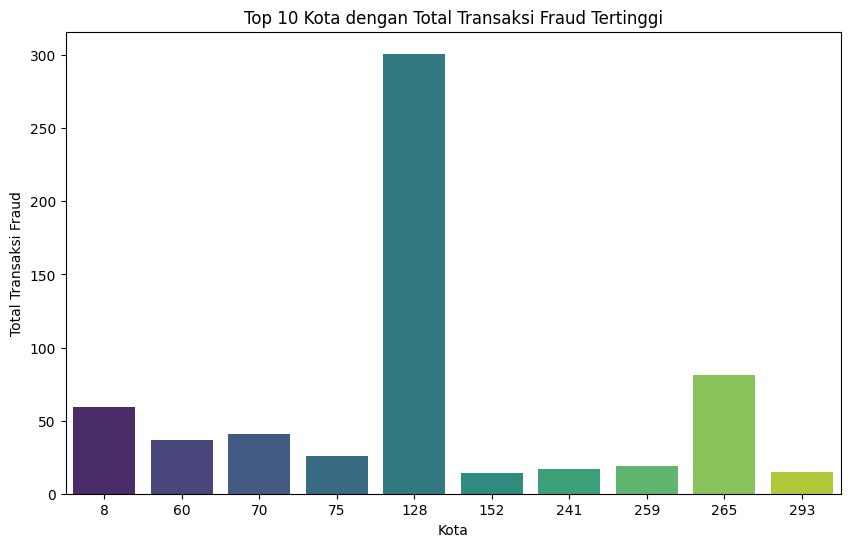

In [24]:
warnings.filterwarnings('ignore')
top_10_fraud_cities = total_fraud_by_city.nlargest(10)

# Buat plot bar horizontal
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_fraud_cities.index, y=top_10_fraud_cities.values, palette="viridis")
plt.title("Top 10 Kota dengan Total Transaksi Fraud Tertinggi")
plt.xlabel("Kota")
plt.ylabel("Total Transaksi Fraud")
plt.show()

In [16]:
# Menghitung total transaksi fraud per negara
total_fraud_by_country = data[data['flag_transaksi_fraud'] == 1].groupby('nama_negara')['flag_transaksi_fraud'].count()

# Cetak total transaksi fraud per negara
print("Total Transaksi Fraud per Negara:")
print(total_fraud_by_country)

Total Transaksi Fraud per Negara:
nama_negara
5     897
7       4
11      1
15      4
16      4
Name: flag_transaksi_fraud, dtype: int64


In [17]:
# Menghitung total transaksi fraud per merchant
total_fraud_by_merchant = data[data['flag_transaksi_fraud'] == 1].groupby('nama_merchant')['flag_transaksi_fraud'].count()

# Cetak total transaksi fraud per merchant
print("Total Transaksi Fraud per Merchant:")
print(total_fraud_by_merchant)

Total Transaksi Fraud per Merchant:
nama_merchant
7         1
19        1
27        1
39        1
92        1
102       1
118       1
122       1
173       1
191       1
239       1
258       1
269       1
272       1
354       1
422       1
434       1
599       1
656       1
661       1
692       1
720       1
842       1
849       1
903       1
927       1
969       1
974       1
985       1
1000      1
1011      1
1142      1
1153      1
1191      1
1192      1
1205      1
1400      1
1465      1
1485      2
1512      1
1574      1
1585      1
1588      1
1645      1
1686      1
1732      1
1735      1
1758      1
1798    856
1834      1
1835      1
1836      1
1850      1
1859      1
Name: flag_transaksi_fraud, dtype: int64


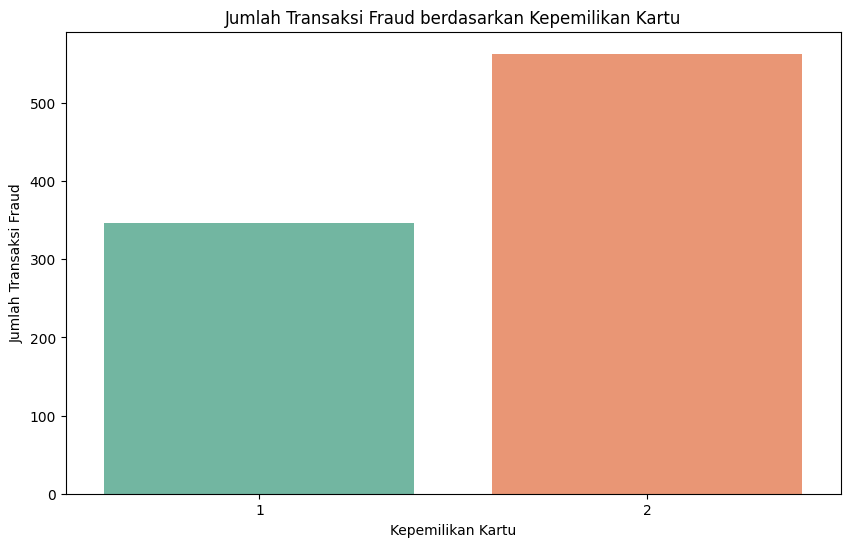

Total Transaksi Fraud per Kepemilikan Kartu:
kepemilikan_kartu
1    347
2    563
Name: flag_transaksi_fraud, dtype: int64


In [18]:
warnings.filterwarnings('ignore')

# Filter data transaksi fraud
fraud_data = data[data['flag_transaksi_fraud'] == 1]

# Plot data transaksi fraud dengan kepemilikan kartu
plt.figure(figsize=(10, 6))
sns.countplot(data=fraud_data, x='kepemilikan_kartu', palette='Set2')
plt.title('Jumlah Transaksi Fraud berdasarkan Kepemilikan Kartu')
plt.xlabel('Kepemilikan Kartu')
plt.ylabel('Jumlah Transaksi Fraud')
plt.show()

# Menghitung total transaksi fraud per kepemilikan kartu
total_fraud_by_kepemilikan_kartu = data[data['flag_transaksi_fraud'] == 1].groupby('kepemilikan_kartu')['flag_transaksi_fraud'].count()

# Cetak total transaksi fraud per kepemilikan kartu
print("Total Transaksi Fraud per Kepemilikan Kartu:")
print(total_fraud_by_kepemilikan_kartu)

Dapat diketahui transaksi fraud banyak terjadi di negara 5 dan merchant 1798 bahkan dapat dilihat adanya gap yang sangat jauh dengan negara dan merchant lainnya, lalu banyaknya terjadi fraud pada kepemilikan kartu 2

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import f1_score

In [20]:
# Menggantikan nilai yang hilang dengan mean (atau median)
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(data.drop(columns=['flag_transaksi_fraud']))
y = imputer.fit_transform(data[['flag_transaksi_fraud']])

# Bagi dataset menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standarisasi fitur (opsional, tergantung pada model yang digunakan)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
# Membuat model Regresi Logistik
model = LogisticRegression()

# Melatih model
model.fit(X_train, y_train)

# Memprediksi data pengujian
y_pred = model.predict(X_test)

# Mengukur akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi Model:", accuracy)

from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)

# Lakukan cross-validation dengan 5 fold untuk model LogisticRegression
cv_scores_ada = cross_val_score(model, X_train, y_train, cv=5)

# Tampilkan hasil cross-validation
print(f"CV Scores (LogisticRegression): {cv_scores_ada}")
print(f"Mean CV Score (LogisticRegression): {cv_scores_ada.mean()}")

# Hitung F-Measure
f_measure = f1_score(y_test, y_pred)

print(f'F-Measure: {f_measure}')

Akurasi Model: 0.9321904761904762
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96      2444
         1.0       0.53      0.15      0.23       181

    accuracy                           0.93      2625
   macro avg       0.73      0.57      0.60      2625
weighted avg       0.91      0.93      0.91      2625

CV Scores (LogisticRegression): [0.93       0.92952381 0.93047619 0.93095238 0.93047619]
Mean CV Score (LogisticRegression): 0.9302857142857143
F-Measure: 0.23275862068965514


#### Precision:
Untuk kelas 0 (non-fraud), precision cukup tinggi (0.94), yang berarti sebagian besar transaksi yang diprediksi sebagai non-fraud adalah benar-benar non-fraud. Namun, untuk kelas 1 (fraud), precision rendah (0.53), yang berarti sebagian besar transaksi yang diprediksi sebagai fraud sebenarnya bukan fraud.

#### Recall: 
Recall untuk kelas 0 (non-fraud) sangat tinggi (0.99), yang berarti sebagian besar transaksi non-fraud berhasil terdeteksi. Namun, untuk kelas 1 (fraud), recall rendah (0.15), yang berarti hanya sedikit transaksi fraud yang terdeteksi dari yang sebenarnya.

#### F1-score: 
F1-score adalah rata-rata harmonik dari precision dan recall. Untuk kelas 0, F1-score tinggi (0.96), sedangkan untuk kelas 1, F1-score rendah (0.23).

#### Accuracy: 
Akurasi keseluruhan adalah 0.93, yang mengindikasikan sebagian besar prediksi yang benar. Namun, karena dataset tidak seimbang, akurasi bisa menyesatkan. Dalam kasus ini, akurasi tinggi disebabkan oleh prediksi yang benar untuk kelas non-fraud (kelas mayoritas), sementara sebagian besar transaksi fraud tidak terdeteksi.

In [22]:
# Inisialisasi model AdaBoost Classifier
ada_model = AdaBoostClassifier(n_estimators=50, random_state=42)

# Melatih model pada data pelatihan
ada_model.fit(X_train, y_train)

# Membuat prediksi
y_pred_ada = ada_model.predict(X_test)

# Mengukur akurasi model AdaBoost
accuracy_ada = accuracy_score(y_test, y_pred_ada)
print(f'Akurasi Model AdaBoost: {accuracy_ada}')

# Menampilkan laporan klasifikasi
print(classification_report(y_test, y_pred_ada))

# Lakukan cross-validation dengan 5 fold untuk model AdaBoost
cv_scores_ada = cross_val_score(ada_model, X_train, y_train, cv=5)

# Tampilkan hasil cross-validation
print(f"CV Scores (AdaBoost): {cv_scores_ada}")
print(f"Mean CV Score (AdaBoost): {cv_scores_ada.mean()}")

# Hitung F-Measure
f_measure = f1_score(y_test, y_pred)

print(f'F-Measure: {f_measure}')

Akurasi Model AdaBoost: 0.9321904761904762
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.96      2444
         1.0       0.52      0.23      0.32       181

    accuracy                           0.93      2625
   macro avg       0.73      0.61      0.64      2625
weighted avg       0.92      0.93      0.92      2625

CV Scores (AdaBoost): [0.93190476 0.93714286 0.93904762 0.93619048 0.93666667]
Mean CV Score (AdaBoost): 0.9361904761904762
F-Measure: 0.23275862068965514


In [23]:
# Inisialisasi dan melatih model RandomForest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Membuat prediksi
y_pred = model.predict(X_test)

warnings.filterwarnings('ignore')

# Mengukur akurasi model
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi: {accuracy}')

# Menampilkan laporan klasifikasi
print(classification_report(y_test, y_pred))

# Inisialisasi model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Lakukan cross-validation dengan 5 fold
cv_scores = cross_val_score(model, X_train, y_train, cv=5)

# Tampilkan hasil cross-validation
print(f"CV Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean()}")

# Hitung F-Measure
f_measure = f1_score(y_test, y_pred)

print(f'F-Measure: {f_measure}')

Akurasi: 0.9428571428571428
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      2444
         1.0       0.73      0.27      0.40       181

    accuracy                           0.94      2625
   macro avg       0.84      0.63      0.68      2625
weighted avg       0.93      0.94      0.93      2625

CV Scores: [0.93428571 0.94380952 0.94142857 0.93714286 0.94047619]
Mean CV Score: 0.9394285714285715
F-Measure: 0.39516129032258057


Model Random Forest telah memberikan hasil yang cukup baik dalam hal akurasi dan metrik klasifikasi seperti presisi, recall, dan f1-score. Selain itu, hasil dari cross-validation (CV Scores) juga menunjukkan bahwa model ini stabil dan tidak overfitting.

Namun, perlu diperhatikan bahwa recall untuk kelas 1 (fraud) masih relatif rendah, yang berarti masih ada banyak kasus fraud yang tidak terdeteksi oleh model. Hal ini mungkin perlu diperbaiki atau disempurnakan melalui penyesuaian hyperparameter model, pemilihan fitur yang lebih tepat, atau penggunaan teknik lain seperti oversampling atau undersampling untuk mengatasi ketidakseimbangan kelas.

Selanjutnya, Anda dapat terus mengoptimalkan model Anda dan melakukan eksperimen lebih lanjut untuk meningkatkan performa deteksi fraud. Juga, penting untuk memastikan bahwa model Anda diterapkan dengan benar dalam lingkungan produksi untuk mendeteksi fraud secara real-time.